In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sales-data/sales_data_sample.csv


In [2]:
import pandas as pd

df = pd.read_csv("/kaggle/input/sales-data/sales_data_sample.csv", encoding='latin1')

In [3]:
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [4]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [5]:
df.tail()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small
2822,10414,47,65.52,9,3079.44,5/6/2005 0:00,On Hold,2,5,2005,...,8616 Spinnaker Dr.,NaN,Boston,MA,51003,USA,NaN,Yoshido,Juri,Medium


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [7]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [8]:
df.value_counts

<bound method DataFrame.value_counts of       ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0           10107               30      95.70                2  2871.00   
1           10121               34      81.35                5  2765.90   
2           10134               41      94.74                2  3884.34   
3           10145               45      83.26                6  3746.70   
4           10159               49     100.00               14  5205.27   
...           ...              ...        ...              ...      ...   
2818        10350               20     100.00               15  2244.40   
2819        10373               29     100.00                1  3978.51   
2820        10386               43     100.00                4  5417.57   
2821        10397               34      62.24                1  2116.16   
2822        10414               47      65.52                9  3079.44   

            ORDERDATE    STATUS  QTR_ID  MONTH_ID  YEAR_ID 

In [9]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [10]:
df.STATUS.unique()

array(['Shipped', 'Disputed', 'In Process', 'Cancelled', 'On Hold',
       'Resolved'], dtype=object)

In [11]:
df.describe(include='all')

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823,2823,2823.000000,2823.000000,2823.00000,...,2823,302,2823,1337,2747,2823,1749,2823,2823,2823
unique,NaN,NaN,NaN,NaN,NaN,252,6,NaN,NaN,NaN,...,92,9,73,16,73,19,3,77,72,3
top,NaN,NaN,NaN,NaN,NaN,11/14/2003 0:00,Shipped,NaN,NaN,NaN,...,"C/ Moralzarzal, 86",Level 3,Madrid,CA,28034,USA,EMEA,Freyre,Diego,Medium
freq,NaN,NaN,NaN,NaN,NaN,38,2617,NaN,NaN,NaN,...,259,55,304,416,259,1004,1407,259,259,1384
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,NaN,NaN,2.717676,7.092455,2003.81509,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,92.085478,9.741443,20.174277,4.225841,1841.865106,NaN,NaN,1.203878,3.656633,0.69967,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,10100.000000,6.000000,26.880000,1.000000,482.130000,NaN,NaN,1.000000,1.000000,2003.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,NaN,NaN,2.000000,4.000000,2003.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,NaN,NaN,3.000000,8.000000,2004.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,NaN,NaN,4.000000,11.000000,2004.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.TERRITORY.unique()

array([nan, 'EMEA', 'APAC', 'Japan'], dtype=object)

In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


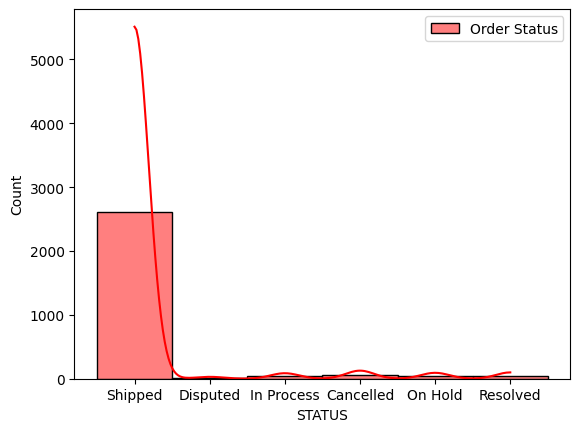

In [14]:
sns.histplot(data=df, x='STATUS', color='red', label="Order Status", kde=True)

plt.legend()

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


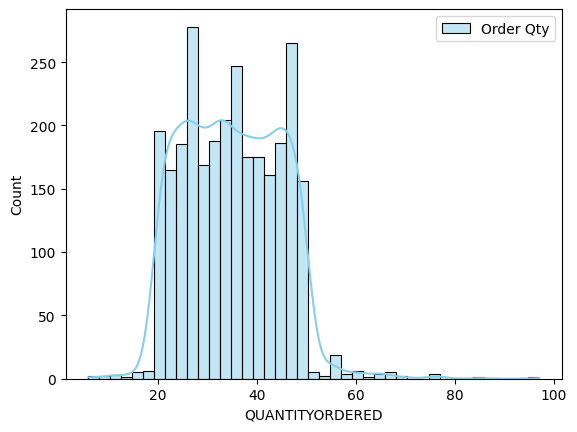

In [15]:
sns.histplot(data=df, x='QUANTITYORDERED', color='skyblue', label="Order Qty", kde=True)

plt.legend()

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


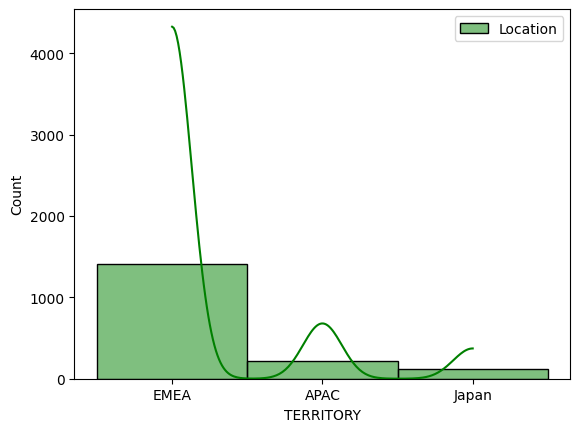

In [16]:
sns.histplot(data=df, x='TERRITORY', color='green', label="Location", kde=True)

plt.legend()

plt.show()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [18]:
df=df[['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'CITY', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE']]

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

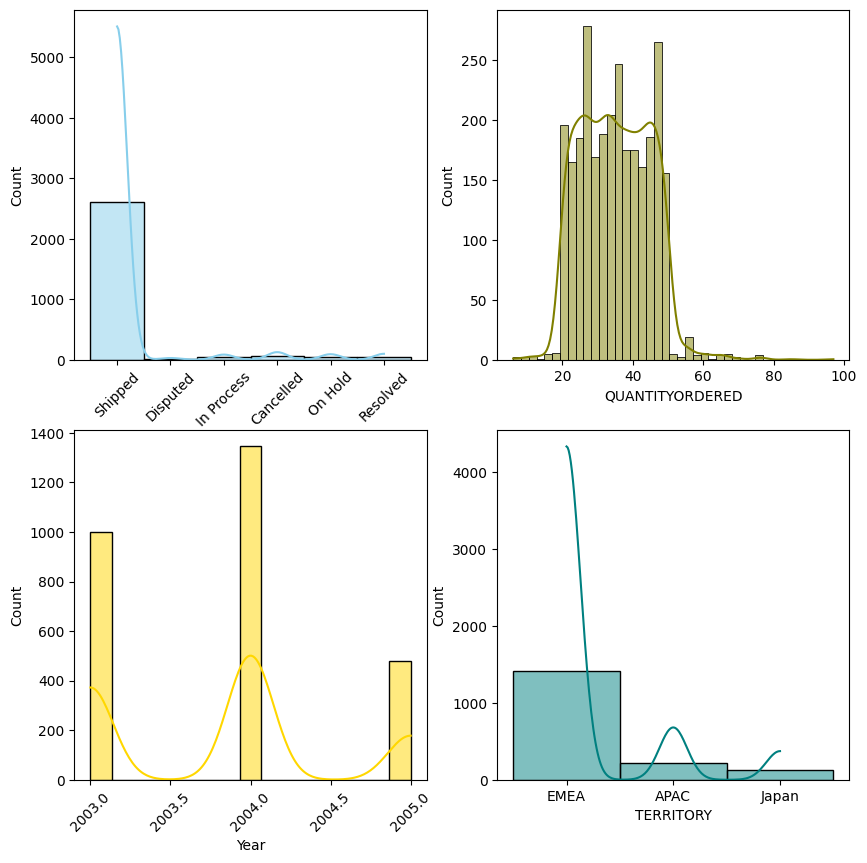

In [19]:
# Create a grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Plot histograms on separate subplots
sns.histplot(data=df, x="STATUS", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="QUANTITYORDERED", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x="YEAR_ID", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df, x="TERRITORY", kde=True, color="teal", ax=axs[1, 1])

#labels
axs[0,0].set_xlabel('Status')
axs[0,0].set_ylabel('Count')
axs[0,0].tick_params(axis='x',rotation=45)

axs[1,0].set_xlabel('Year')
axs[1,0].set_ylabel('Count')
axs[1,0].tick_params(axis='x',rotation=45)

# Show plot
plt.show()

In [20]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,San Francisco,NaN,USA,NaN,Brown,Julie,Medium


In [21]:
df1 = pd.read_csv("/kaggle/input/sales-data/sales_data_sample.csv", encoding='latin1')

In [22]:
df1.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [23]:
df_value=pd.DataFrame(df.value_counts())
df_value

count
ORDERNUMBER QUANTITYORDERED PRICEEACH ORDERLINENUMBER SALES   ORDERDATE       STATUS     QTR_ID MONTH_ID YEAR_ID PRODUCTLINE      MSRP PRODUCTCODE CUSTOMERNAME          PHONE             ADDRESSLINE1                               CITY        POSTALCODE COUNTRY     TERRITORY CONTACTLASTNAME CONTACTFIRSTNAME DEALSIZE       
10101       25              100.00    4               3782.00 1/9/2003 0:00   Shipped    1      1        2003    Vintage Cars     127  S18_2325    Blauer See Auto, Co.  +49 69 66 90 2555 Lyonerstr. 34                              Frankfurt   60528      Germany     EMEA      Keitel          Roland           Medium        1
10314       28              100.00    12              3403.12 10/22/2004 0:00 Shipped    4      10       2004    Trucks and Buses 115  S50_1392    Heintze Collectables  86 21 3555        Smagsloget 45                              Aaarhus     8200       Denmark     EMEA      Ibsen           Palle            Medium        1
            46              100.00    6               6393.54 10/22/2004 0:00 Shipped    4      10       2004    Classic Cars     151  S12_3148    Heintze Collectables  86 21 3555        Smagsloget 45                              Aaarhus     8200       Denmark     EMEA      Ibsen           Palle            Medium        1
            45              100.00    14              6185.70 10/22/2004 0:00 Shipped    4      10       2004    Trucks and Buses 118  S12_4473    Heintze Collectables  86 21 3555        Smagsloget 45                              Aaarhus     8200       Denmark     EMEA      Ibsen           Palle            Medium        1
            44              53.18     11              2339.92 10/22/2004 0:00 Shipped    4      10       2004    Classic Cars     57   S24_1444    Heintze Collectables  86 21 3555        Smagsloget 45                              Aaarhus     8200       Denmark     EMEA      Ibsen           Palle            Small         1
...                                                                                                                                                                                                                                                                                                                             ...
10203       21              37.00     2               777.00  12/2/2003 0:00  Shipped    4      12       2003    Classic Cars     37   S24_2972    Euro Shopping Channel (91) 555 94 44    C/ Moralzarzal, 86                         Madrid      28034      Spain       EMEA      Freyre          Diego            Small         1
            20              100.00    8               3930.40 12/2/2003 0:00  Shipped    4      12       2003    Classic Cars     194  S12_1099    Euro Shopping Channel (91) 555 94 44    C/ Moralzarzal, 86                         Madrid      28034      Spain       EMEA      Freyre          Diego            Medium        1
                                      6               2254.80 12/2/2003 0:00  Shipped    4      12       2003    Classic Cars     117  S12_3380    Euro Shopping Channel (91) 555 94 44    C/ Moralzarzal, 86                         Madrid      28034      Spain       EMEA      Freyre          Diego            Small         1
10198       48              67.82     5               3255.36 11/27/2003 0:00 Shipped    4      11       2003    Planes           68   S24_2841    Cruz & Sons Co.       +63 2 555 3587    15 McCallum Street - NatWest Center #13-03 Makati City 1227 MM    Philippines Japan     Cruz            Arnold           Medium        1
10425       55              46.82     1               2575.10 5/31/2005 0:00  In Process 2      5        2005    Classic Cars     57   S24_1444    La Rochelle Gifts     40.67.8555        67, rue des Cinquante Otages               Nantes      44000      France      EMEA      Labrune         Janine           Small         1

[1749 rows x 1 columns]

In [24]:
df1

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [25]:
df1['TERRITORY']=df1['TERRITORY'].replace('Japan','APAC')

<Axes: >

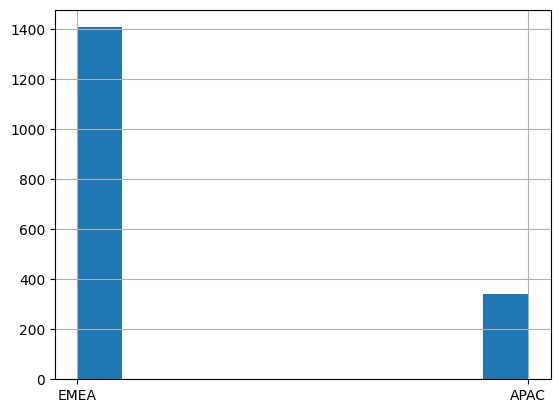

In [26]:
df1['TERRITORY'].hist()

In [27]:
df1.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

<Axes: >

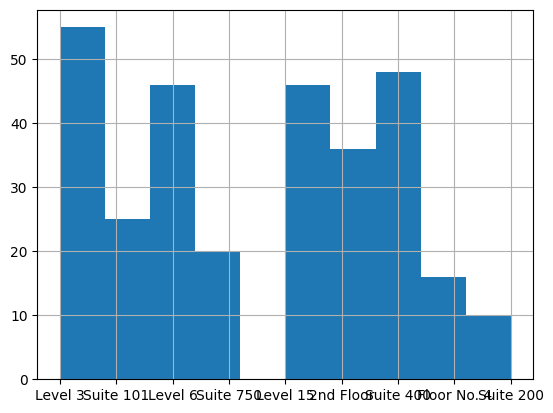

In [28]:
df1['ADDRESSLINE2'].hist()

In [29]:
df1_null=df1[df1['STATE'].isnull()]
df1_null

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
6,10180,29,86.13,9,2497.77,11/11/2003 0:00,Shipped,4,11,2003,...,"184, chausse de Tournai",NaN,Lille,NaN,59000,France,EMEA,Rance,Martine,Small
7,10188,48,100.00,1,5512.32,11/18/2003 0:00,Shipped,4,11,2003,...,"Drammen 121, PR 744 Sentrum",NaN,Bergen,NaN,N 5804,Norway,EMEA,Oeztan,Veysel,Medium
9,10211,41,100.00,14,4708.44,1/15/2004 0:00,Shipped,1,1,2004,...,"25, rue Lauriston",NaN,Paris,NaN,75016,France,EMEA,Perrier,Dominique,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2816,10327,37,86.74,4,3209.38,11/10/2004 0:00,Resolved,4,11,2004,...,Vinb'ltet 34,NaN,Kobenhavn,NaN,1734,Denmark,EMEA,Petersen,Jytte,Medium
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium


In [30]:
df1.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [31]:
df1_null=df1.columns[df1.isna().any()].tolist()
df1_with_null=df1[df1_null]

In [32]:
df1_with_null

,ADDRESSLINE2,STATE,POSTALCODE,TERRITORY
0,NaN,NY,10022,NaN
1,NaN,NaN,51100,EMEA
2,NaN,NaN,75508,EMEA
3,NaN,CA,90003,NaN
4,NaN,CA,NaN,NaN
...,...,...,...,...
2818,NaN,NaN,28034,EMEA
2819,NaN,NaN,90110,EMEA
2820,NaN,NaN,28034,EMEA
2821,NaN,NaN,31000,EMEA


In [33]:
df1.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [34]:
df.YEAR_ID.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2823 entries, 0 to 2822
Series name: YEAR_ID
Non-Null Count  Dtype
--------------  -----
2823 non-null   int64
dtypes: int64(1)
memory usage: 22.2 KB


In [35]:
status=['USA']

In [36]:
status_filtered = df[df['COUNTRY'].isin(status)]

In [37]:
status_filtered.COUNTRY.unique()

array(['USA'], dtype=object)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


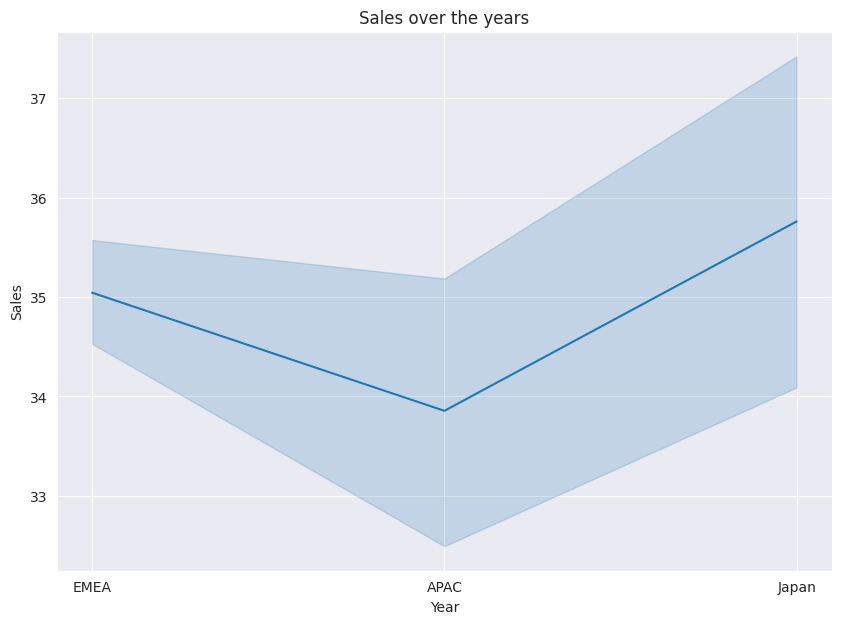

In [38]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,7))
sns.lineplot(x='TERRITORY',y='QUANTITYORDERED', data=df)
plt.xlabel("Year")
plt.ylabel("Sales")
plt.title("Sales over the years")
plt.show();

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

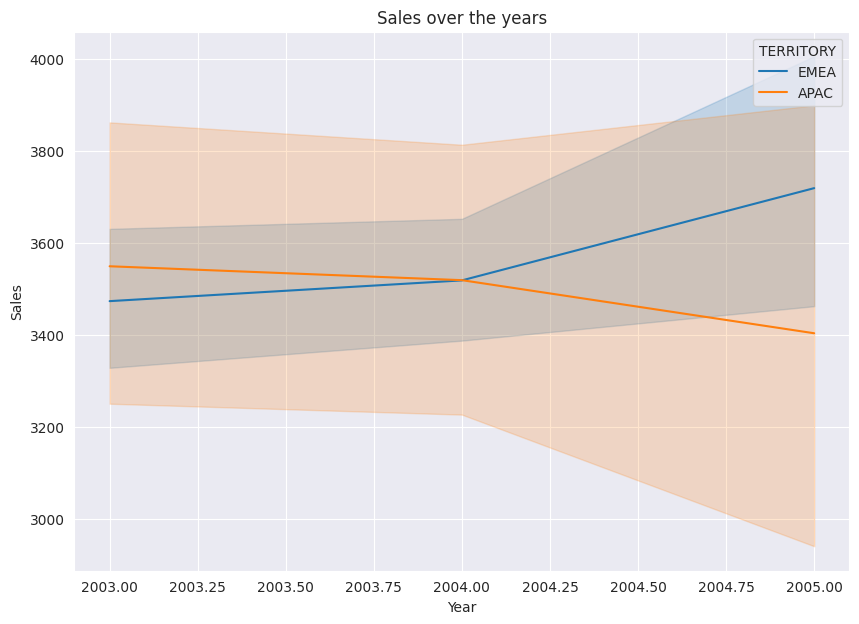

In [39]:
plt.figure(figsize=(10,7))
sns.lineplot(x='YEAR_ID',y='SALES',hue='TERRITORY', data=df1)
plt.xlabel("Year")
plt.ylabel("Sales")
plt.title("Sales over the years")
plt.show();

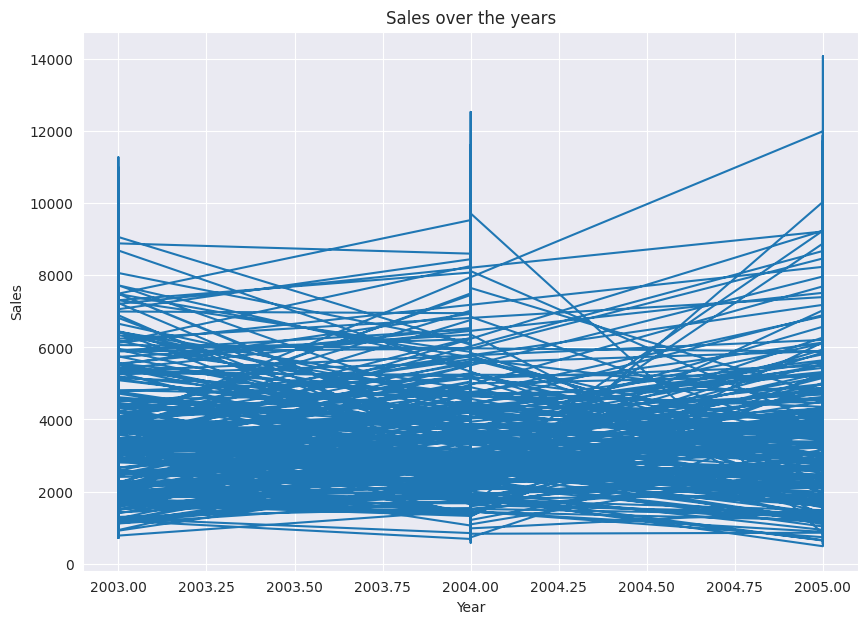

In [40]:
plt.figure(figsize=(10,7))
plt.plot(df['YEAR_ID'],df['SALES'])
plt.xlabel("Year")
plt.ylabel("Sales")
plt.title("Sales over the years")
plt.show()

In [41]:
pivot_table_sales = pd.pivot_table(
    data=df,
    values='SALES',
    index='YEAR_ID',
    aggfunc='sum'
)
pivot_table_yr_sales = pivot_table_sales.reset_index()

In [42]:
pivot_table_yr_sales

,YEAR_ID,SALES
0,2003,3516979.54
1,2004,4724162.60
2,2005,1791486.71


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


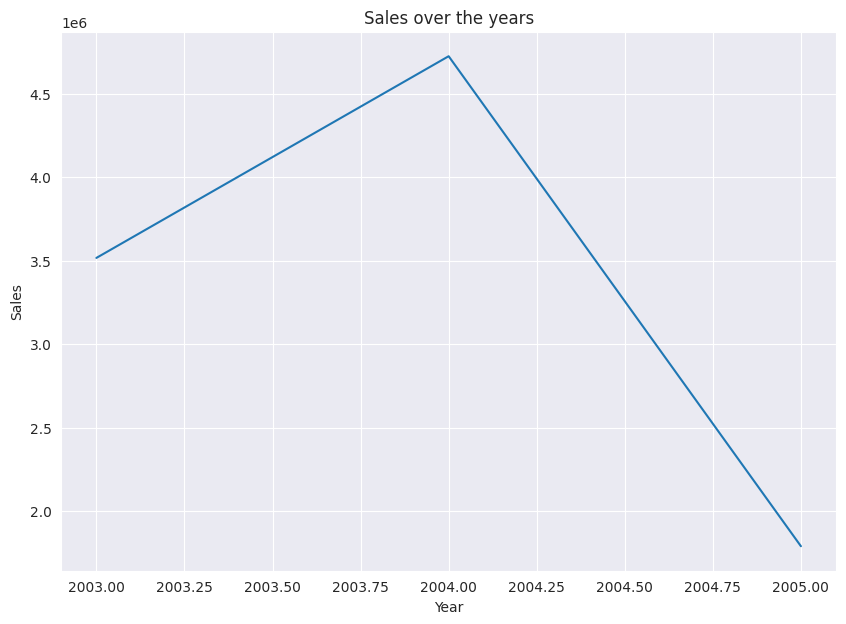

In [43]:
plt.figure(figsize=(10,7))
sns.lineplot(x='YEAR_ID',y='SALES', data=pivot_table_yr_sales)
plt.xlabel("Year")
plt.ylabel("Sales")
plt.title("Sales over the years")
plt.show();

In [44]:
df1.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [45]:
pivot_table_status = df1.pivot_table(
    index='DEALSIZE',
    columns= ['TERRITORY','YEAR_ID'],
    values='QUANTITYORDERED',
    aggfunc='sum'
)

In [46]:
pivot_table_status_1 = pivot_table_status.reset_index()

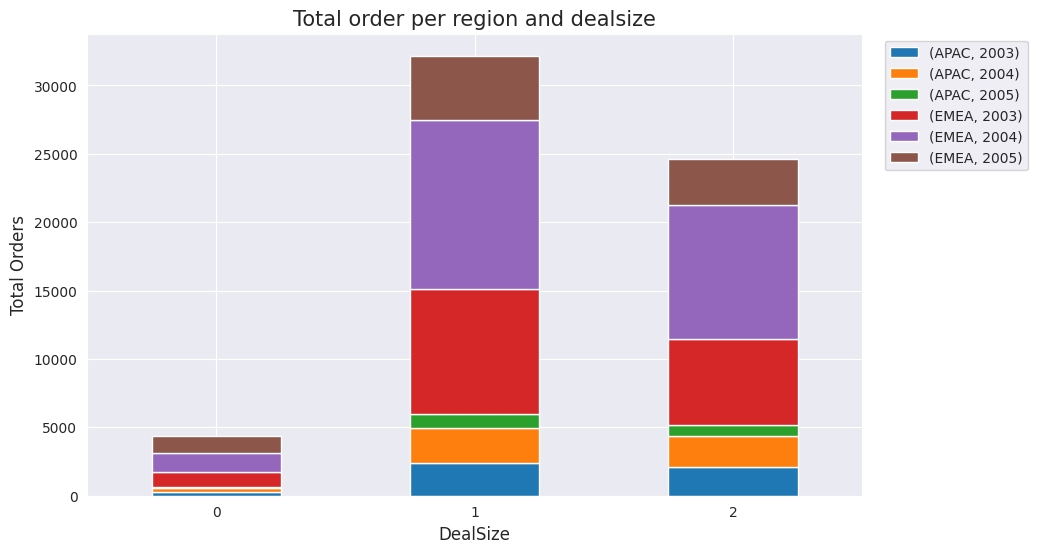

In [47]:
pivot_table_status_1.plot(kind='bar', figsize=(10,6),stacked=True)
plt.xlabel('DealSize', fontsize=12)
plt.ylabel('Total Orders', fontsize=12)
plt.title("Total order per region and dealsize", fontsize=15)
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()

In [48]:
pivot_table_status_year = df1.pivot_table(
    index='DEALSIZE',
    columns= ['YEAR_ID'],
    values='SALES',
    aggfunc='sum'
)
pv_t_yr_status=pivot_table_status_year.reset_index()

In [49]:
pv_t_yr_status

YEAR_ID,DEALSIZE,2003,2004,2005
0,Large,432819.94,517753.71,351545.61
1,Medium,2178711.74,2869357.88,1039362.62
2,Small,905447.86,1337051.01,400578.48


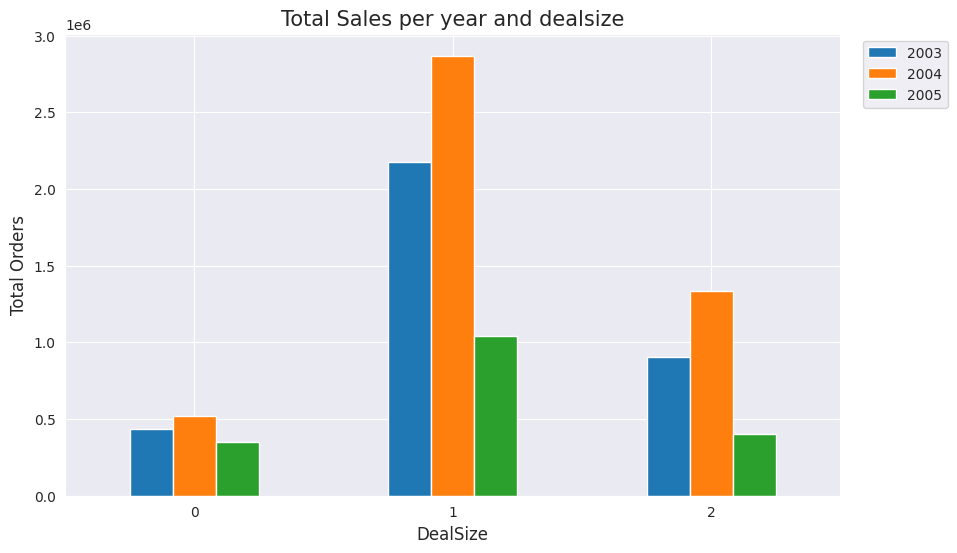

In [50]:
pv_t_yr_status.plot(kind='bar', figsize=(10,6))
plt.xlabel('DealSize', fontsize=12)
plt.ylabel('Total Orders', fontsize=12)
plt.title("Total Sales per year and dealsize", fontsize=15)
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()

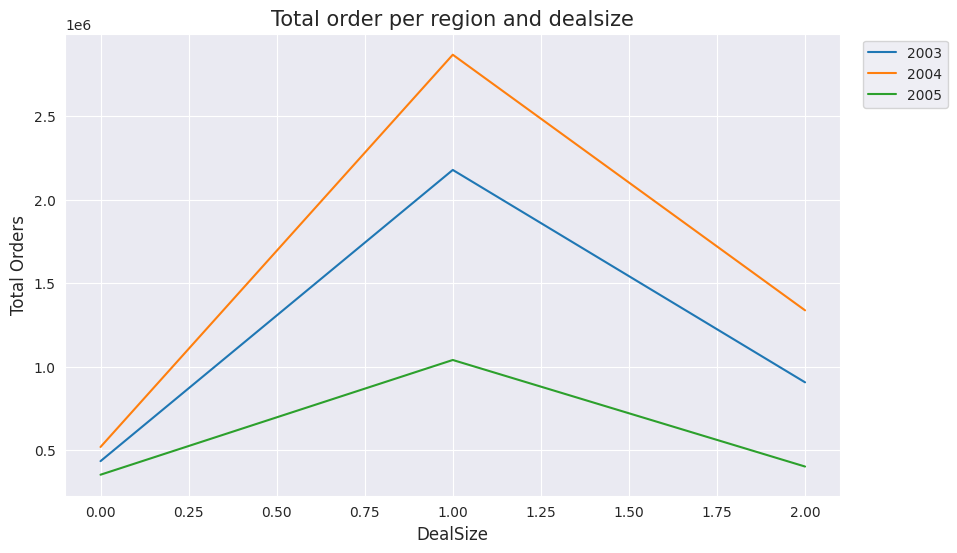

In [51]:
pv_t_yr_status.plot(kind='line', figsize=(10,6))
plt.xlabel('DealSize', fontsize=12)
plt.ylabel('Total Orders', fontsize=12)
plt.title("Total order per region and dealsize", fontsize=15)
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()

In [52]:
pivot_table_terr = pd.pivot_table(
    data=df1,
    values='QUANTITYORDERED',
    index=['TERRITORY'], 
    aggfunc='sum'
)

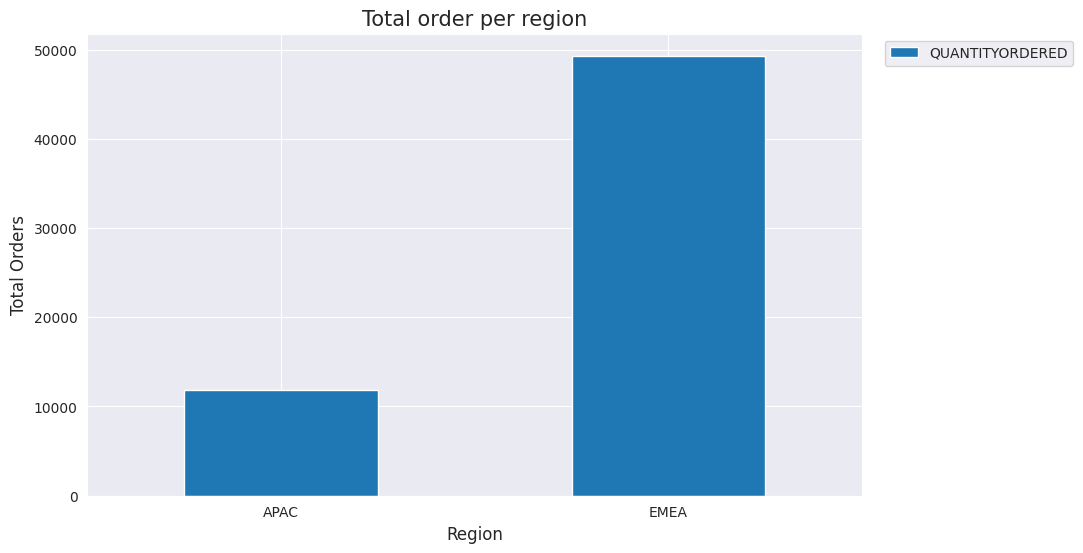

In [53]:
pivot_table_terr.plot(kind='bar', figsize=(10,6))
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Orders', fontsize=12)
plt.title("Total order per region", fontsize=15)
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()

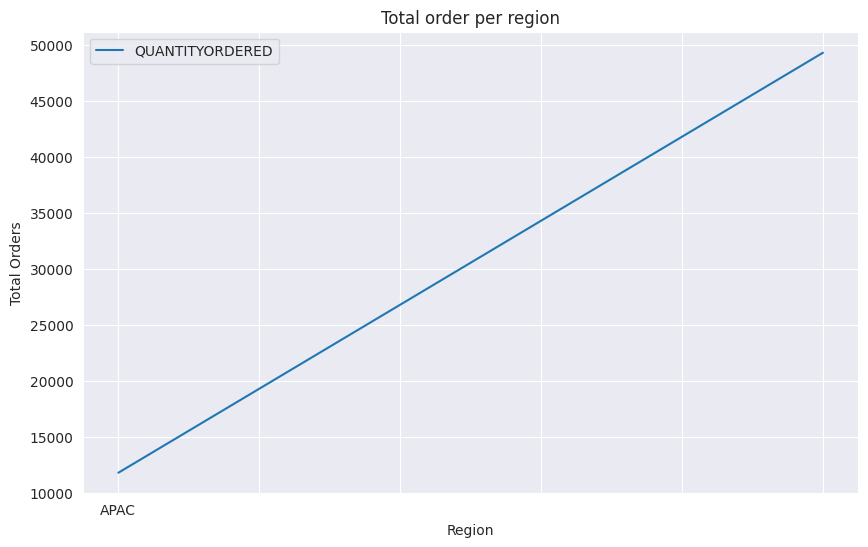

In [54]:
pivot_table_terr.plot(kind='line', figsize=(10,6))
plt.xlabel('Region')
plt.ylabel('Total Orders')
plt.title("Total order per region")
plt.show()

In [55]:
pivot_table_terr

,QUANTITYORDERED
TERRITORY,
APAC,11809
EMEA,49306


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


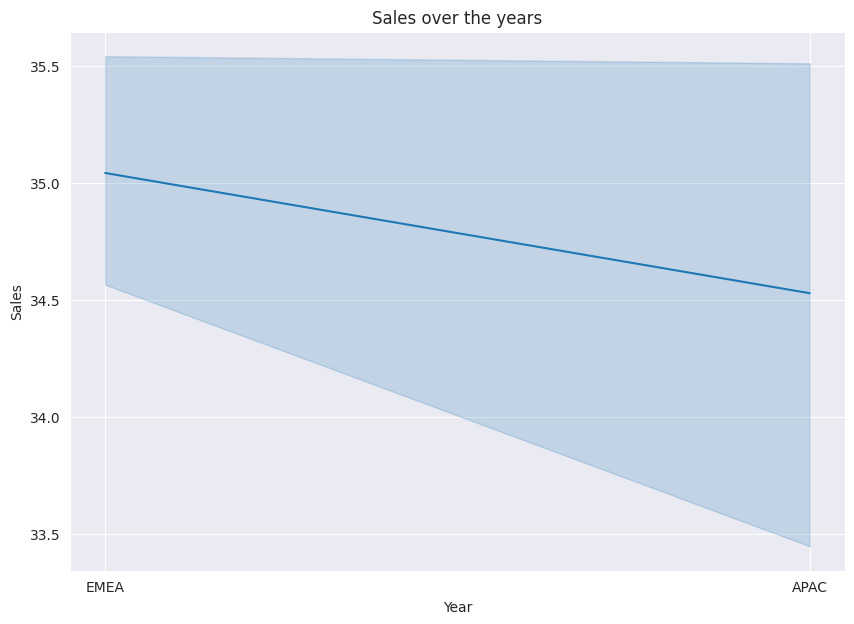

In [56]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,7))
sns.lineplot(x='TERRITORY',y='QUANTITYORDERED', data=df1)
plt.xlabel("Year")
plt.ylabel("Sales")
plt.title("Sales over the years")
plt.show();

In [57]:
pivot_table_territory = pd.pivot_table(
    data=df,
    values='SALES',
    index='TERRITORY',
    aggfunc='sum'
)

In [58]:
pivot_table_territory

,SALES
TERRITORY,
APAC,746121.83
EMEA,4979272.41
Japan,455173.22


In [59]:
pivot_table_territory_avg = pd.pivot_table(
    data=df,
    values='SALES',
    index='TERRITORY',
    aggfunc='mean'
)
pivot_table_territory_avg

,SALES
TERRITORY,
APAC,3376.116878
EMEA,3538.928507
Japan,3761.762149


In [60]:
df1.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [61]:
df.MSRP


0       95
1       95
2       95
3       95
4       95
        ..
2818    54
2819    54
2820    54
2821    54
2822    54
Name: MSRP, Length: 2823, dtype: int64

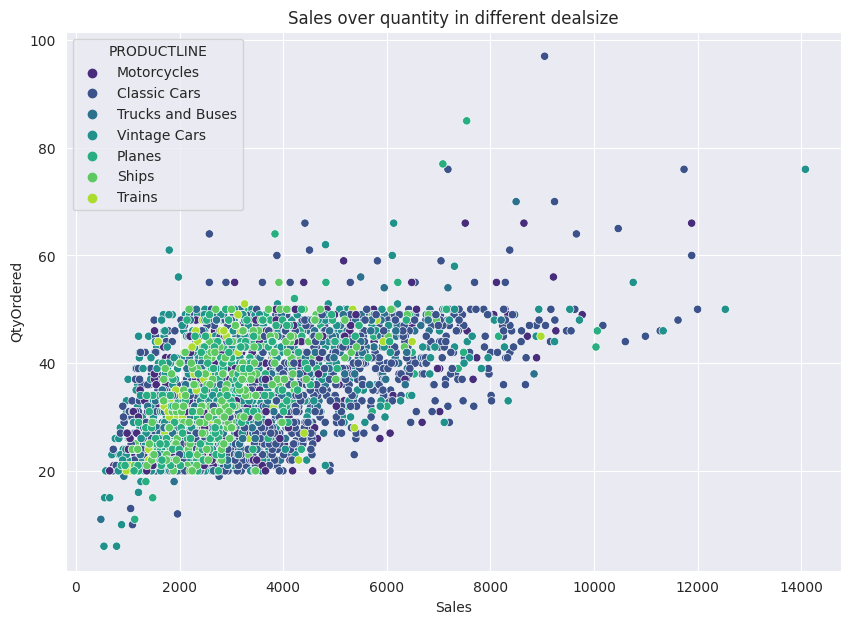

In [62]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,7))
sns.scatterplot(x='SALES',y='QUANTITYORDERED',hue='PRODUCTLINE',data=df1, palette='viridis')
plt.xlabel("Sales")
plt.ylabel("QtyOrdered")
plt.title("Sales over quantity in different dealsize")
plt.show();

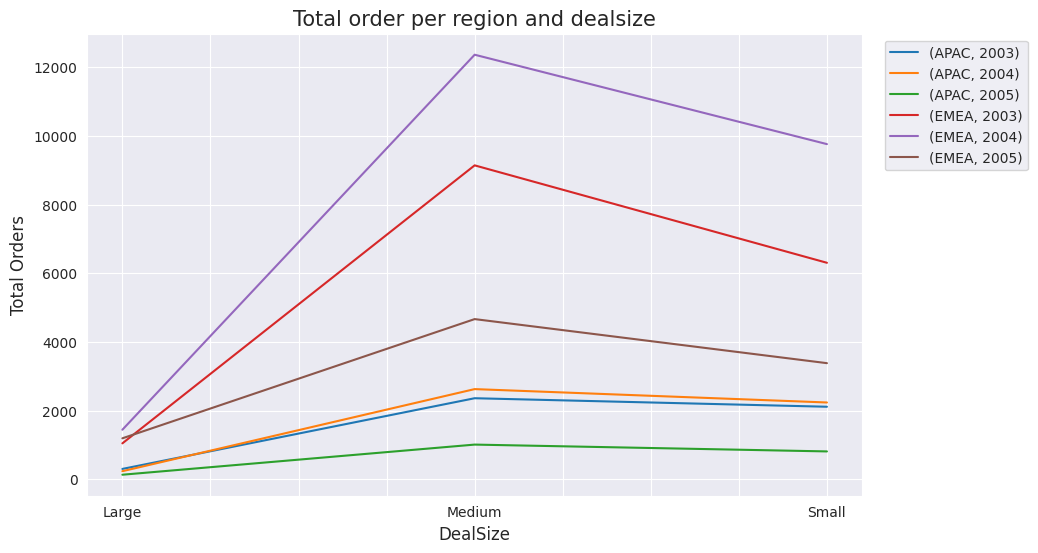

In [63]:
pivot_table_status.plot(kind='line', figsize=(10,6))
plt.xlabel('DealSize', fontsize=12)
plt.ylabel('Total Orders', fontsize=12)
plt.title("Total order per region and dealsize", fontsize=15)
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()

In [64]:
pivot_table_territory_avg = pd.pivot_table(
    data=df1,
    values='SALES',
    index='TERRITORY',
    aggfunc='mean'
)
pivot_table_territory_avg

,SALES
TERRITORY,
APAC,3512.558626
EMEA,3538.928507


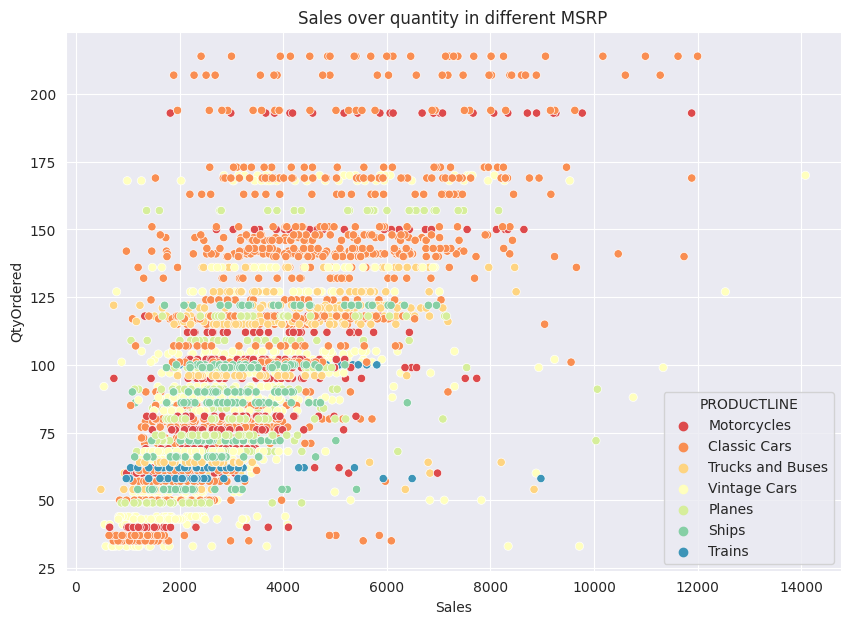

In [65]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,7))
sns.scatterplot(x='SALES',y='MSRP',hue='PRODUCTLINE',data=df1, palette='Spectral')
plt.xlabel("Sales")
plt.ylabel("QtyOrdered")
plt.title("Sales over quantity in different MSRP")
plt.show();

In [66]:
pivot_table_year_month = pd.pivot_table(
    data=df1,
    values='SALES',
    index=['TERRITORY'],
    columns=['YEAR_ID','MONTH_ID'],
    aggfunc='sum'
)
pivot_table_year_month

YEAR_ID        2003                                                      \
MONTH_ID         1          2         3         4          5         6    
TERRITORY                                                                 
APAC            NaN        NaN  55245.02  94055.13    9738.18       NaN   
EMEA       110756.3  115052.43  60766.92  82777.01  149087.31  71992.11   

YEAR_ID                                              ...       2004  \
MONTH_ID         7         8          9          10  ...         8    
TERRITORY                                            ...              
APAC       28397.26       NaN  102051.41   77809.37  ...    3127.88   
EMEA       58022.28  33206.63   85229.40  266049.52  ...  181664.61   

YEAR_ID                                                     2005             \
MONTH_ID          9          10         11         12         1          2    
TERRITORY                                                                     
APAC        42902.84        NaN  163039.40   37905.15   68043.56   21730.03   
EMEA       210361.71  324702.45  503082.36  210167.00  119374.49  217425.83   

YEAR_ID                                     
MONTH_ID          3          4          5   
TERRITORY                                   
APAC        39335.85    3141.53   58349.52  
EMEA       204041.18  116562.83  272424.66  

[2 rows x 29 columns]

In [67]:
df1[['MONTH_ID','TERRITORY','YEAR_ID','SALES']].head()

,MONTH_ID,TERRITORY,YEAR_ID,SALES
0,2,NaN,2003,2871.00
1,5,EMEA,2003,2765.90
2,7,EMEA,2003,3884.34
3,8,NaN,2003,3746.70
4,10,NaN,2003,5205.27


In [68]:
grouped_terr=pd.DataFrame(df1.groupby(['TERRITORY','MONTH_ID','YEAR_ID',])['SALES'].sum())

In [69]:
grouped_terr

SALES
TERRITORY MONTH_ID YEAR_ID           
APAC      1        2004      50490.64
                   2005      68043.56
          2        2004      73857.16
                   2005      21730.03
          3        2003      55245.02
                   2005      39335.85
          4        2003      94055.13
                   2004      17114.43
                   2005       3141.53
          5        2003       9738.18
                   2005      58349.52
          6        2004      71717.47
          7        2003      28397.26
                   2004      53631.96
          8        2004       3127.88
          9        2003     102051.41
                   2004      42902.84
          10       2003      77809.37
          11       2003     129611.26
                   2004     163039.40
          12       2004      37905.15
EMEA      1        2003     110756.30
                   2004     204347.38
                   2005     119374.49
          2        2003     115052.43
                   2004     133954.66
                   2005     217425.83
          3        2003      60766.92
                   2004     126306.14
                   2005     204041.18
          4        2003      82777.01
                   2004     116811.83
                   2005     116562.83
          5        2003     149087.31
                   2004     100267.19
                   2005     272424.66
          6        2003      71992.11
                   2004     110585.25
          7        2003      58022.28
                   2004     166878.31
          8        2003      33206.63
                   2004     181664.61
          9        2003      85229.40
                   2004     210361.71
          10       2003     266049.52
                   2004     324702.45
          11       2003     565873.68
                   2004     503082.36
          12       2003      61500.94
                   2004     210167.00

In [70]:
grouped_terr.columns

Index(['SALES'], dtype='object')

In [71]:
df1_2004= df1[df1['YEAR_ID']==2004]

In [72]:
df1_2004_group=pd.DataFrame(df1_2004.groupby(['TERRITORY','MONTH_ID','YEAR_ID',])['SALES'].sum())
df1_2004_group.reset_index()

,TERRITORY,MONTH_ID,YEAR_ID,SALES
0,APAC,1,2004,50490.64
1,APAC,2,2004,73857.16
2,APAC,4,2004,17114.43
3,APAC,6,2004,71717.47
4,APAC,7,2004,53631.96
5,APAC,8,2004,3127.88
6,APAC,9,2004,42902.84
7,APAC,11,2004,163039.40
8,APAC,12,2004,37905.15
9,EMEA,1,2004,204347.38


In [73]:
pivot_2004 = pd.pivot_table(
    data=df1_2004,
    values='SALES',
    index=['MONTH_ID'],
    columns=['TERRITORY'],
    aggfunc='sum'
)
pivot_2004

TERRITORY,APAC,EMEA
MONTH_ID,,
1,50490.64,204347.38
2,73857.16,133954.66
3,NaN,126306.14
4,17114.43,116811.83
5,NaN,100267.19
6,71717.47,110585.25
7,53631.96,166878.31
8,3127.88,181664.61
9,42902.84,210361.71


In [74]:
df1.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [75]:
pivot_2004.columns

Index(['APAC', 'EMEA'], dtype='object', name='TERRITORY')

In [76]:
df1_2003= df1[df1['YEAR_ID']==2003]
pivot_2003 = pd.pivot_table(
    data=df1_2003,
    values='SALES',
    index='MONTH_ID',
    columns='TERRITORY',
    aggfunc='sum'
)
pivot_2003

TERRITORY,APAC,EMEA
MONTH_ID,,
1,NaN,110756.30
2,NaN,115052.43
3,55245.02,60766.92
4,94055.13,82777.01
5,9738.18,149087.31
6,NaN,71992.11
7,28397.26,58022.28
8,NaN,33206.63
9,102051.41,85229.40


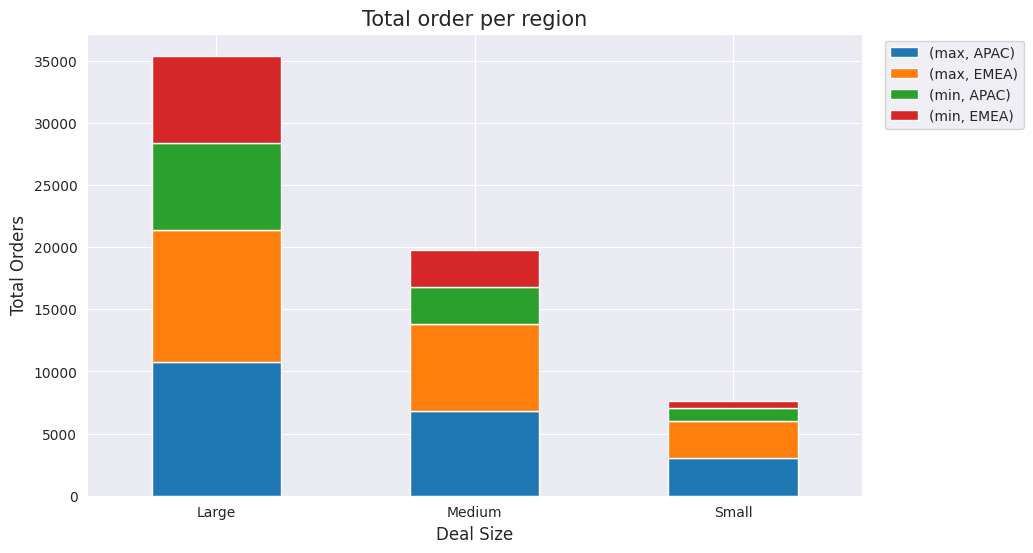

In [77]:
df1_2004= df1[df1['YEAR_ID']==2004]
pivot_2004 = pd.pivot_table(data=df1_2004,values='SALES',index=['DEALSIZE'],columns='TERRITORY',aggfunc=['max','min'])
pivot_2004.plot(kind='bar', figsize=(10,6), stacked=True)
plt.xlabel('Deal Size', fontsize=12)
plt.ylabel('Total Orders', fontsize=12)
plt.title("Total order per region", fontsize=15)
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()

In [78]:
df1_2005= df1[df1['YEAR_ID']==2005]
pivot_2005 = pd.pivot_table(
    data=df1_2005,
    values='SALES',
    index='MONTH_ID',
    columns='TERRITORY',
    aggfunc='sum'
)
pivot_2005

TERRITORY,APAC,EMEA
MONTH_ID,,
1,68043.56,119374.49
2,21730.03,217425.83
3,39335.85,204041.18
4,3141.53,116562.83
5,58349.52,272424.66


In [79]:
pivot_2004.reset_index().columns

MultiIndex([('DEALSIZE',     ''),
            (     'max', 'APAC'),
            (     'max', 'EMEA'),
            (     'min', 'APAC'),
            (     'min', 'EMEA')],
           names=[None, 'TERRITORY'])

In [80]:
df1_2004

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
9,10211,41,100.00,14,4708.44,1/15/2004 0:00,Shipped,1,1,2004,...,"25, rue Lauriston",NaN,Paris,NaN,75016,France,EMEA,Perrier,Dominique,Medium
10,10223,37,100.00,1,3965.66,2/20/2004 0:00,Shipped,1,2,2004,...,636 St Kilda Road,Level 3,Melbourne,Victoria,3004,Australia,APAC,Ferguson,Peter,Medium
11,10237,23,100.00,7,2333.12,4/5/2004 0:00,Shipped,2,4,2004,...,2678 Kingston Rd.,Suite 101,NYC,NY,10022,USA,NaN,Frick,Michael,Small
12,10251,28,100.00,2,3188.64,5/18/2004 0:00,Shipped,2,5,2004,...,7476 Moss Rd.,NaN,Newark,NJ,94019,USA,NaN,Brown,William,Medium
13,10263,34,100.00,2,3676.76,6/28/2004 0:00,Shipped,2,6,2004,...,25593 South Bay Ln.,NaN,Bridgewater,CT,97562,USA,NaN,King,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2814,10306,35,59.51,6,2082.85,10/14/2004 0:00,Shipped,4,10,2004,...,Fauntleroy Circus,NaN,Manchester,NaN,EC2 5NT,UK,EMEA,Ashworth,Victoria,Small
2815,10315,40,55.69,5,2227.60,10/29/2004 0:00,Shipped,4,10,2004,...,"67, rue des Cinquante Otages",NaN,Nantes,NaN,44000,France,EMEA,Labrune,Janine,Small
2816,10327,37,86.74,4,3209.38,11/10/2004 0:00,Resolved,4,11,2004,...,Vinb'ltet 34,NaN,Kobenhavn,NaN,1734,Denmark,EMEA,Petersen,Jytte,Medium
2817,10337,42,97.16,5,4080.72,11/21/2004 0:00,Shipped,4,11,2004,...,5905 Pompton St.,Suite 750,NYC,NY,10022,USA,NaN,Hernandez,Maria,Medium


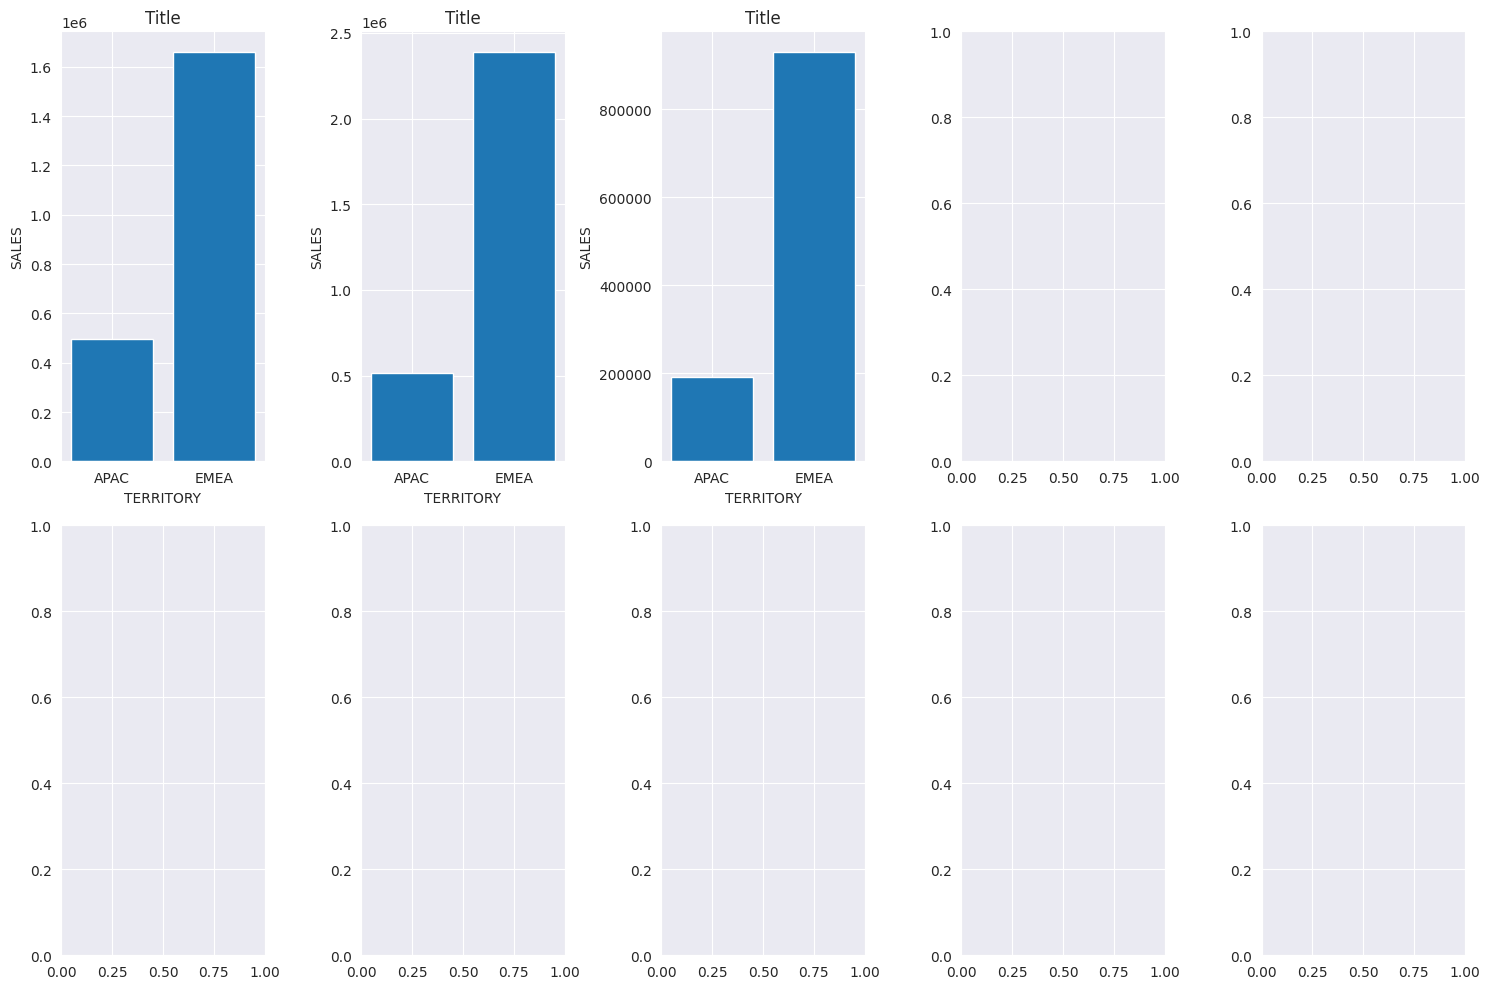

In [81]:
sales_per_year=df1.groupby(['YEAR_ID','TERRITORY']).SALES.sum().reset_index(name='SALES')
pivot_table_yearwise = sales_per_year.pivot(index='YEAR_ID',columns='TERRITORY', values='SALES')


# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 10))
axes = axes.flatten()

# Plot data
for i, year in enumerate(pivot_table_yearwise.index):
    ax = axes[i]
    ax.bar(pivot_table_yearwise.columns, pivot_table_yearwise.loc[year])
    ax.set_title('Title')
    ax.set_xlabel('TERRITORY')
    ax.set_ylabel('SALES')

# Adjust layout
fig.tight_layout()
plt.show()

<Axes: xlabel='YEAR_ID'>

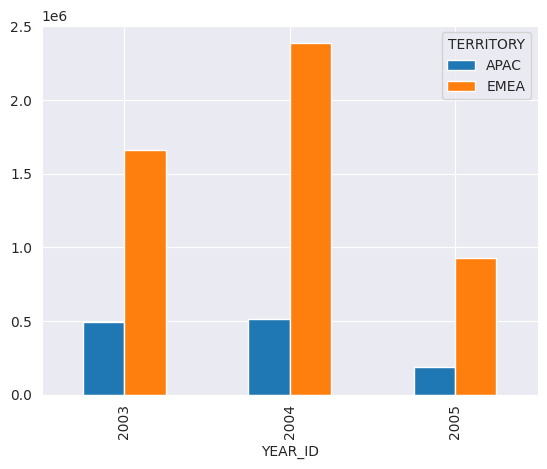

In [82]:
pivot_table_yearwise.plot(kind='bar')

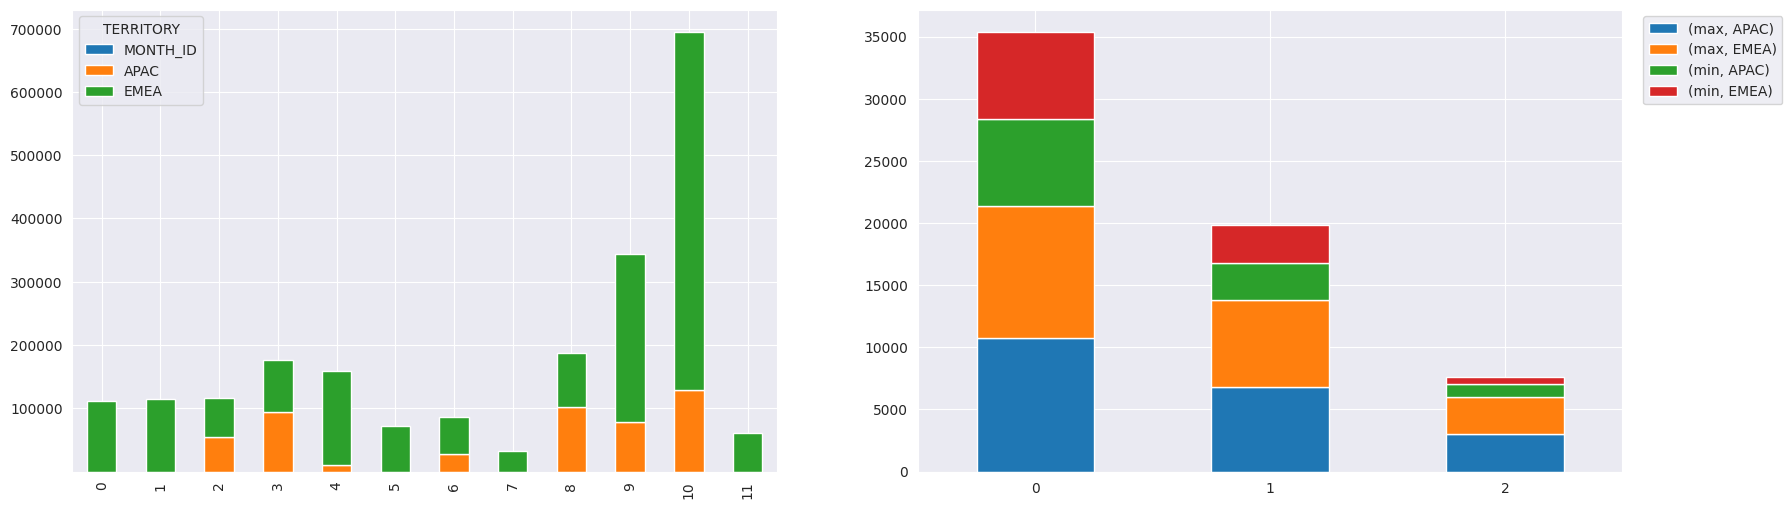

In [83]:
fig, axes = plt.subplots(nrows=1, ncols=2)
pivot_2004.reset_index().plot(kind='bar', figsize=(20,6), stacked=True, ax=axes[1])
ax.set_xlabel('Month', fontsize=5)
ax.set_ylabel('Total sales', fontsize=5)
ax.set_title("Total sales per month per region in 2004", fontsize=8)
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')



pivot_2003.reset_index().plot(kind='bar', figsize=(20,6), stacked=True, ax=axes[0])
ax.set_xlabel('Month', fontsize=5)
ax.set_ylabel('Total sales', fontsize=5)
ax.set_title("Total sales per month per region in 2003", fontsize=8)
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.savefig("2003_2004")
plt.show()

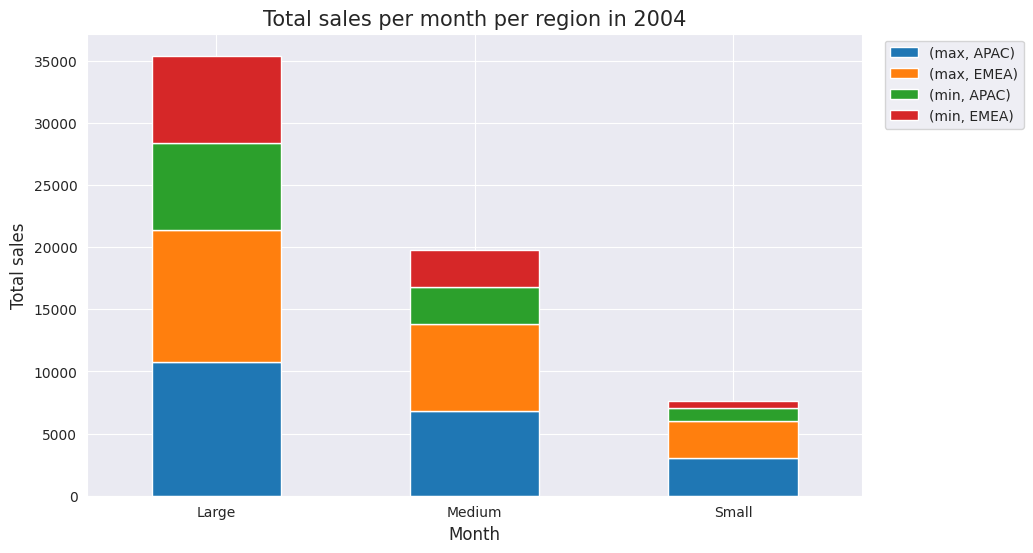

In [84]:
pivot_2004.plot(kind='bar', figsize=(10,6), stacked=True)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total sales', fontsize=12)
plt.title("Total sales per month per region in 2004", fontsize=15)
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()

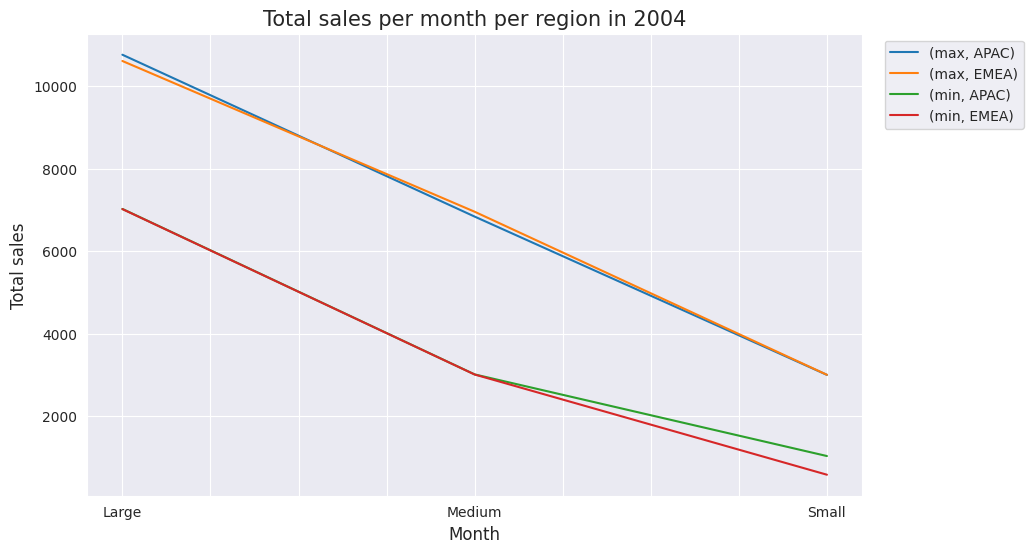

In [85]:
pivot_2004.plot(kind='line', figsize=(10,6))
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total sales', fontsize=12)
plt.title("Total sales per month per region in 2004", fontsize=15)
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()

In [86]:
df1.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [87]:
q1 = df1['QUANTITYORDERED'].quantile(0.25) 
q2 = df1['QUANTITYORDERED'].quantile(0.50)
q3 = df1['QUANTITYORDERED'].quantile(0.75)

In [88]:
q1

27.0

In [89]:
q2

35.0

In [90]:
q3

43.0

In [91]:
IQR = q3-q1
IQR

16.0

In [92]:
lower_bound = q1 - 1.5*IQR


upper_bound = q3 + 1.5*IQR

In [93]:
lower_bound

3.0

In [94]:
upper_bound

67.0

In [95]:
outlier = df1[(df1['QUANTITYORDERED'] < lower_bound) | (df1['QUANTITYORDERED'] > upper_bound)]

outlier

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
418,10405,97,93.28,5,9048.16,4/14/2005 0:00,Shipped,2,4,2005,...,"24, place Kluber",NaN,Strasbourg,NaN,67000,France,EMEA,Citeaux,Frederique,Large
598,10407,76,100.00,2,14082.80,4/22/2005 0:00,On Hold,2,4,2005,...,3086 Ingle Ln.,NaN,San Jose,CA,94217,USA,NaN,Frick,Sue,Large
1666,10412,70,100.00,10,8498.00,5/3/2005 0:00,Shipped,2,5,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Large
1714,10407,76,94.50,6,7182.00,4/22/2005 0:00,On Hold,2,4,2005,...,3086 Ingle Ln.,NaN,San Jose,CA,94217,USA,NaN,Frick,Sue,Large
1995,10405,76,100.00,3,11739.70,4/14/2005 0:00,Shipped,2,4,2005,...,"24, place Kluber",NaN,Strasbourg,NaN,67000,France,EMEA,Citeaux,Frederique,Large
1996,10419,70,100.00,8,9240.00,5/17/2005 0:00,Shipped,2,5,2005,...,Geislweg 14,NaN,Salzburg,NaN,5020,Austria,EMEA,Pipps,Georg,Large
2586,10401,85,88.75,10,7543.75,4/3/2005 0:00,On Hold,2,4,2005,...,7476 Moss Rd.,NaN,Newark,NJ,94019,USA,NaN,Brown,William,Large
2689,10401,77,92.00,9,7084.00,4/3/2005 0:00,On Hold,2,4,2005,...,7476 Moss Rd.,NaN,Newark,NJ,94019,USA,NaN,Brown,William,Large


<Axes: >

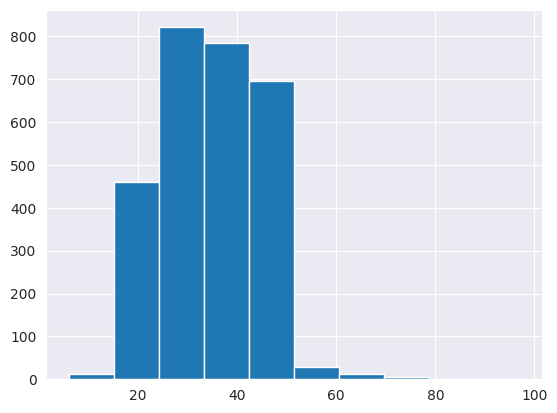

In [96]:
df['QUANTITYORDERED'].hist()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


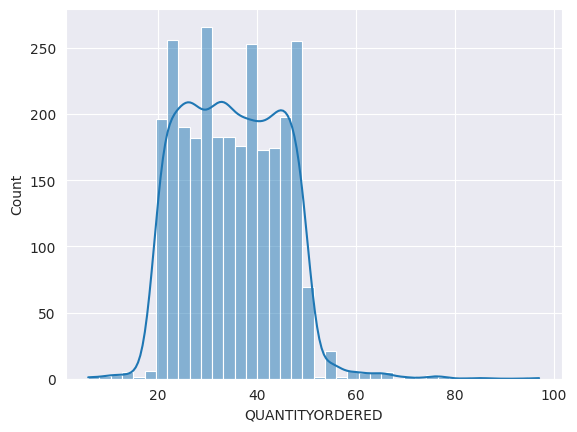

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df1['QUANTITYORDERED'],kde=True, bins=40)
plt.show()

In [98]:
pip list

Package                                  Version
---------------------------------------- ------------------
absl-py                                  1.4.0
accelerate                               0.30.1
access                                   1.1.9
affine                                   2.4.0
aiobotocore                              2.13.0
aiofiles                                 22.1.0
aiohttp                                  3.9.1
aioitertools                             0.11.0
aiorwlock                                1.3.0
aiosignal                                1.3.1
aiosqlite                                0.19.0
albumentations                           1.4.0
alembic                                  1.13.1
altair                                   5.3.0
annotated-types                          0.6.0
annoy                                    1.17.3
anyio                                    4.2.0
apache-beam                              2.46.0
aplus                                